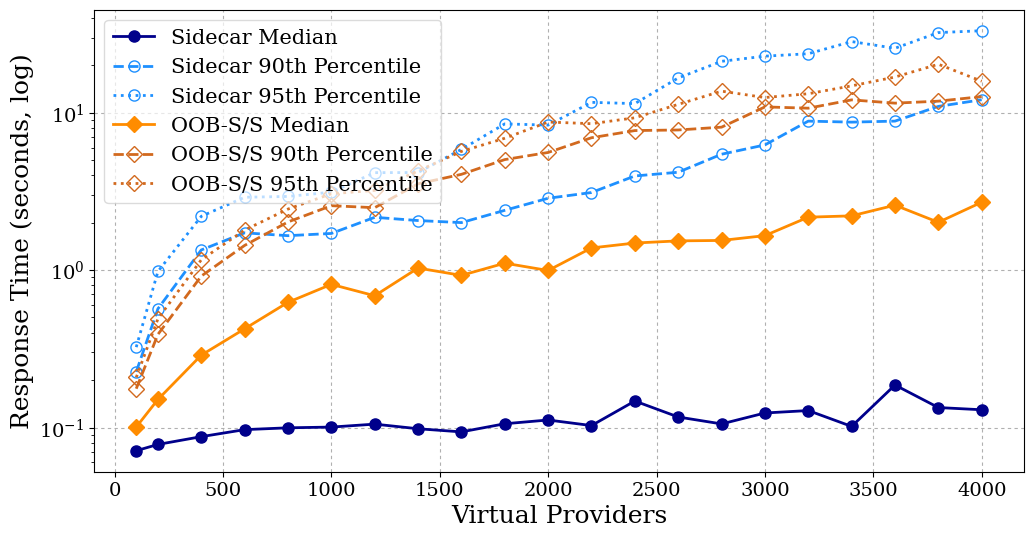

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

# Constants
oobss = 'oob-s/s'
jodi  = 'jodi'
name  = "Sidecar"

# Set global font settings to a serif font like Times New Roman
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.size']   = 14  

labelFontSize=18
lagendFontSize=15

# Load the CSV file
df = pd.read_csv('../k6-rt.csv')

# Convert response times from milliseconds to seconds
df["Median"] = df["Median"] / 1000
df["P(90)"]  = df["P(90)"]  / 1000
df["P(95)"]  = df["P(95)"]  / 1000
df["Protocol"] = df["Protocol"].str.lower()

# ------------------------------ Response Time Chart ------------------------------
plt.figure(figsize=(12, 6))

# Define colors, linestyles, and protocol‐specific markers
color_medians     = { jodi: "darkblue",    oobss: "darkorange" }
color_percentiles = { jodi: "dodgerblue",  oobss: "chocolate"   }
linestyles = {
    "Median": "solid",
    "P(90)":  "dashed",
    "P(95)":  "dotted"
}
# different marker shape per protocol
protocol_markers = {
    jodi:  "o",   # circle for Sidecar
    oobss: "D"    # diamond for OOB-SS
}
# differentiate percentiles by fill: median markers filled, percentiles hollow
fill_marker = {
    "Median": True,
    "P(90)":  False,
    "P(95)":  False
}

for protocol in [jodi, oobss]:
    subset     = df[df["Protocol"] == protocol].sort_values("VUs")
    proto_lbl  = name if protocol == jodi else protocol.upper()
    base_marker = protocol_markers[protocol]

    for metric in ["Median", "P(90)", "P(95)"]:
        c = (color_medians if metric == "Median" else color_percentiles)[protocol]
        ls = linestyles[metric]
        mkr = base_marker
        fc  = c if fill_marker[metric] else "none"
        ec  = c

        plt.plot(
            subset["VUs"],
            subset[metric],
            color=c,
            linestyle=ls,
            linewidth=2,
            marker=mkr,
            markersize=8,
            markerfacecolor=fc,
            markeredgecolor=ec,
            label=f"{proto_lbl} {metric if metric=='Median' else metric.replace('P(', '').replace(')', 'th Percentile')}"
        )

plt.yscale("log")
plt.xlabel("Virtual Providers", fontsize=labelFontSize)
plt.ylabel("Response Time (seconds, log)", fontsize=labelFontSize)
plt.legend(
    loc='upper left',
    fontsize=lagendFontSize,
    title_fontsize=lagendFontSize,
    framealpha=0.7
)
plt.grid(True, linestyle=(0, (3, 3)), linewidth=0.8, zorder=0)

plt.savefig("../charts/res-time.pdf", bbox_inches='tight', dpi=300)
plt.show()
